In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.signal import find_peaks

[600.13447237 567.17946841 451.71250721 431.08245559 462.16610769
 574.70029572 606.26132092]


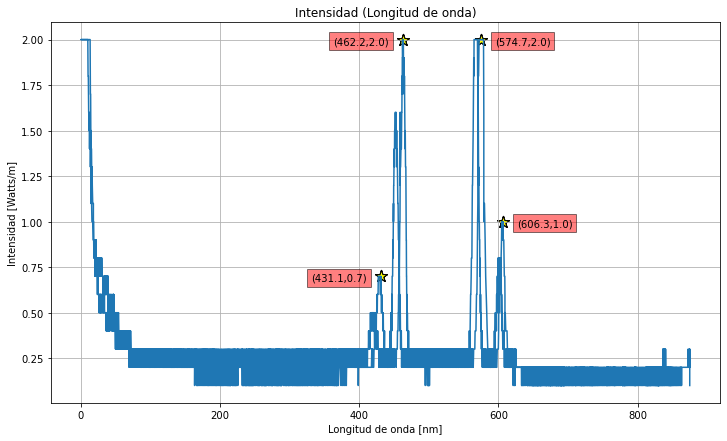

In [27]:
#Comando para abrir y leer el archivo de texto "espectroscopía T1.txt"
f = open('espectroscopia T1.txt') 
lines = f.readlines()
ang,I = [],[]
for i in range(len(lines)):
    if i>1:
        d = lines[i].split('\t')
        ang.append(float(d[0].replace(',','.')))
        I.append(float(d[1].replace(',','.')))
        
#Ajuste de cifras.         
ang = [cifra / 59 for cifra in ang]   #Dividimos entre 59 para efectos de corregir la rotación
ang = [cifra + 31.6 for cifra in ang]  #Sumamos grados para centrar la medición en el ángulo cero
ang =[np.abs(cifra) for cifra in ang]  #Función de valor absoluto
lamda = np.array([(1670)*np.sin(np.deg2rad(cifra)) for cifra in ang]) #Calculando la longitud de onda ligada a cada ángulo

#Comando para ubicar los peaks de longitudes de onda en el gráfico
peaks = find_peaks(I,height=0.6,distance=100)
ang = np.array(ang)
I = np.array(I)
peaksI,peaksA = I[peaks[0]],lamda[peaks[0]]

peaksI = peaksI[peaksA>300]
peaksA = peaksA[peaksA>300]
print(peaksA)
Index = [3,4,5,6] #Seleccionamos los peaks de nuestro interés
peaksI = [peaksI[i] for i in Index]
peaksA = [peaksA[i] for i in Index]

fig,ax = plt.subplots(1,1,figsize=(12,7))


#Grafica de datos de longitud de onda e intensidad
ax.plot(lamda, I)
ax.set_xlabel("Longitud de onda [nm]")
ax.set_ylabel("Intensidad [Watts/m]")
ax.set_title("Intensidad (Longitud de onda)")
ax.grid(True)

#Ajuste de peaks
ax.scatter(peaksA,peaksI,marker='*',edgecolor='black',s=150,color='yellow')
for i in range(len(peaksA)):
    
    if i in [0,1]:
        
        ax.text(peaksA[i]-100,peaksI[i]-0.025,f'({round(peaksA[i],1)},{round(peaksI[i],1)})',bbox=dict(facecolor='red', alpha=0.5))
        ax.scatter(peaksA,peaksI,marker='*',edgecolor='black',s=150,color='yellow')
    else:
        
        ax.text(peaksA[i]+20,peaksI[i]-0.025,f'({round(peaksA[i],1)},{round(peaksI[i],1)})',bbox=dict(facecolor='red', alpha=0.5))
        ax.scatter(peaksA,peaksI,marker='*',edgecolor='black',s=150,color='yellow')
        ax.grid(True)

plt.show()